In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil


In [54]:
saveFile = "NH105_Energy.csv"
fileName = 'NH105_Energy.csv'
csvFilePath = './txtFiles/%s' % fileName
ruta_carpeta = './graficas/%s' % saveFile
archivo_plot  = 'graph.png'
graph_path = os.path.join(ruta_carpeta, archivo_plot)
data = pd.read_csv(csvFilePath)


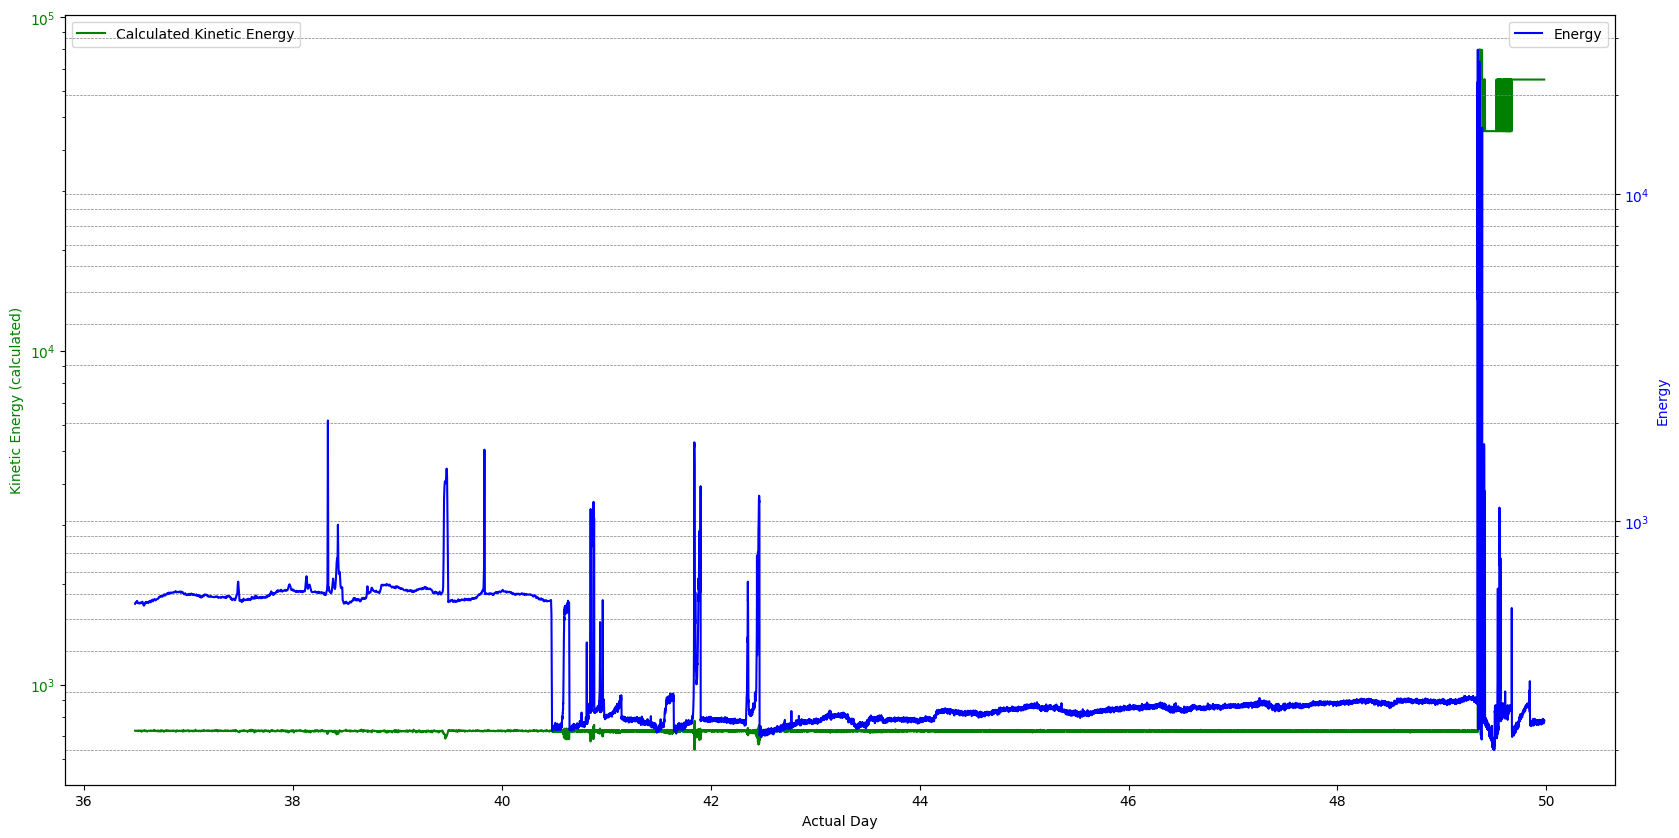

Primeros valores de calculatedEnergy:
0    727.835490
1    727.033012
2    728.329596
3    727.533161
4    727.682967
5    727.912769
6    726.764749
7    727.673347
8    729.185162
9    727.648954
Name: CalEn, dtype: float64
Primeros valores de energy:
0    558.557070
1    563.855478
2    563.339152
3    564.274756
4    569.290787
5    569.327674
6    561.408942
7    560.934934
8    560.659433
9    559.966963
Name: Energy, dtype: float64


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: './txtFiles/NH105_Energy.csv'

In [61]:

# --------------------
# Convertir la columna Temp a numérico, forzando errores a NaN
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce')
# Definir el rango máximo de temperatura
max_temp = 1500
# Filtrar datos para mantener solo las temperaturas dentro del rango deseado
data_filtered = data[data['Temp'] <= max_temp]
# Normalizar la columna Temp dividiéndola entre 25.6
data_filtered['Temp'] = data_filtered['Temp'] / 25.6

# --------------------
day = data_filtered['tDays']
temp = data_filtered['Temp']
energy = np.sqrt(data_filtered['Energy'])
CalEn = np.sqrt(data_filtered['CalEn'])

#------------------------

os.makedirs(ruta_carpeta, exist_ok=True)

# -----------------------

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(20, 10))

# Graficar la energía cinética calculada en el eje izquierdo (calculatedEnergy vs Actual Day)
ax1.plot(day, CalEn, color='g', label='Calculated Kinetic Energy')
ax1.set_xlabel('Actual Day')
ax1.set_ylabel('Kinetic Energy (calculated)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
plt.yscale('log')


# Ajustar escala logarítmica en el eje Y

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Configurar cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Guardar la gráfica como un archivo PNG
plt.savefig(graph_path, format='png')
plt.show()
# Imprimir los primeros 10 valores para verificar las magnitudes
print("Primeros valores de calculatedEnergy:")
print(CalEn.head(10))

print("Primeros valores de energy:")
print(energy.head(10))
#-------------
if not os.path.isfile(csvFilePath):
    print(f'El archivo de origen no existe: {csvFilePath}')
else:
    new_csv_file_path = os.path.join(ruta_carpeta, f'{fileName}')
    os.makedirs(ruta_carpeta, exist_ok=True)
    shutil.move(csvFilePath, new_csv_file_path)



In [32]:
comportamiento = '-'
new_folder_path = ruta_carpeta + comportamiento 

if not os.path.exists(new_folder_path):
    # Renombrar la carpeta
    os.rename(ruta_carpeta, new_folder_path)
    print(f'Carpeta renombrada a: {new_folder_path}')
else:
    print(f'La carpeta de destino ya existe: {new_folder_path}')

Carpeta renombrada a: ./graficas/2015-AA0011-Energy-infertil
